In [110]:
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import gaussian
from skimage.io import imread, imsave
from skimage import util
from scipy import ndimage as ndi
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

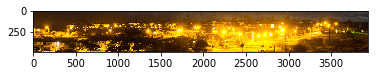

In [54]:
img = imread('./crop.jpg')
_ = plt.imshow(img)

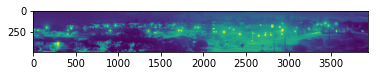

In [167]:
gimg = gaussian(img.mean(axis=2), sigma=5)
_ = plt.imshow(gimg)

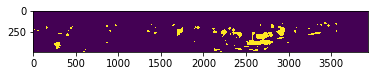

In [168]:
thresh = (gimg > 160)
_ = plt.imshow(thresh)

/home/probinso/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


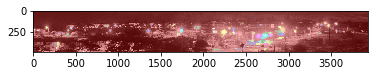

In [169]:
#distance = ndi.distance_transform_edt(gimg)
local_maxi = peak_local_max(gimg, indices=False, footprint=np.ones((10, 10)))

markers = ndi.label(local_maxi)[0]
labels = watershed(np.max(gimg) - gimg, markers, mask = thresh)
colored = label2rgb(labels, image=img, bg_color=(0,0,0))
_ = imsave('out.png', colored)
_ = plt.imshow(colored)

In [165]:
labels.max() # number of ound regions

629

In [177]:
red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]

keys = iter(range(labels.max()))
_ = next(keys)
for target in keys:
    target_red   = red[(labels == target) & (red < 255)]
    target_green = green[(labels == target) & (green < 255)]
    target_blue  = blue[(labels == target) & (blue < 255)]
